#**Exploring Factors Affecting Student Stress Levels Using Data Analysis and Random Forest Regression**

##**Introduction**
This project aims to analyze how various factors, such as sleep quality, headache frequency, academic performance, study load, and extracurricular activity frequency, influence student stress levels. Using a dataset collected from students, the analysis involves cleaning the data, handling missing values, and performing exploratory data analysis to understand patterns and relationships between stress levels and other variables. Finally, a Random Forest Regression model is trained to predict stress levels based on these factors, providing insights into which variables contribute most significantly to stress. This approach helps identify actionable strategies to improve student well-being and academic performance.

In [4]:
# =============================================
# STUDENT STRESS FACTORS ANALYSIS PROJECT
# =============================================

# This notebook performs:
# 1. Data loading & cleaning
# 2. Exploratory Data Analysis (EDA)
# 3. Correlation Analysis
# 4. Predictive Modeling (Random Forest)
# 5. Feature Importance Interpretation
# =============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# -------------------------------------------------------
# 1. LOAD DATA
# -------------------------------------------------------

# Upload your file in Colab, then use the filename below:
df = pd.read_csv("Student Stress Factors.csv")

df.head()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


#**Step 2**
Before beginning the analysis, I first prepared the dataset by standardizing the column names. This step ensures that each variable is clearly labeled and easy to reference throughout the project. Clean, consistent column names also help prevent errors during data manipulation and make the overall workflow more organized and readable.


In [6]:
# -------------------------------------------------------
# 2. CLEAN COLUMN NAMES
# -------------------------------------------------------

df.columns = [
    "sleep_quality",
    "headache_frequency",
    "academic_performance",
    "study_load",
    "extracurricular_frequency",
    "stress_level"
]

df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   sleep_quality              520 non-null    int64
 1   headache_frequency         520 non-null    int64
 2   academic_performance       520 non-null    int64
 3   study_load                 520 non-null    int64
 4   extracurricular_frequency  520 non-null    int64
 5   stress_level               520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


(   sleep_quality  headache_frequency  academic_performance  study_load  \
 0              3                   1                     3           4   
 1              4                   1                     2           3   
 2              2                   1                     2           1   
 3              3                   2                     3           2   
 4              2                   3                     1           5   
 
    extracurricular_frequency  stress_level  
 0                          2             3  
 1                          3             2  
 2                          4             4  
 3                          3             3  
 4                          5             3  ,
 None)

#**Step 3**
Before moving forward with the analysis, I cleaned the dataset by handling missing values and ensuring that all variables had the correct data types.
I first converted each column to a numeric format to avoid issues caused by string-stored numbers.
Then, I identified and removed any rows containing missing values, since the dataset was small enough that dropping them would not significantly affect the results.
After cleaning, I generated summary statistics to confirm that the data was ready for analysis.

In [7]:
# -------------------------------------------------------
# 3. HANDLE MISSING VALUES & CLEAN DATA TYPES
# -------------------------------------------------------

# Convert to numeric in case data is stored as strings
df = df.apply(pd.to_numeric, errors='coerce')

# Count missing values
print("Missing values per column:")
print(df.isna().sum())

# Drop missing rows (small dataset)
df = df.dropna()

# Summary statistics
df.describe()


Missing values per column:
sleep_quality                0
headache_frequency           0
academic_performance         0
study_load                   0
extracurricular_frequency    0
stress_level                 0
dtype: int64


,sleep_quality,headache_frequency,academic_performance,study_load,extracurricular_frequency,stress_level
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,3.125000,2.182692,3.326923,2.750000,2.682692,2.875000
std,1.099023,1.247459,1.061158,1.372381,1.470745,1.357825
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,3.000000,2.000000,3.000000,2.500000,3.000000,3.000000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#**Step 4**
To better understand the overall structure and patterns in the dataset, I conducted an exploratory data analysis (EDA).
EDA includes histograms, scatterplots, correlation matrix.
This step helps reveal trends, relationships, and potential outliers before moving into modeling.

I began by visualizing the distribution of stress levels to get a sense of how this key variable is spread.
Then, I created scatter plots comparing stress with sleep quality, study load, and headache frequency to observe whether any noticeable relationships or patterns existed between these factors.
These visualizations provide an initial foundation for interpreting the data and guiding later analysis.

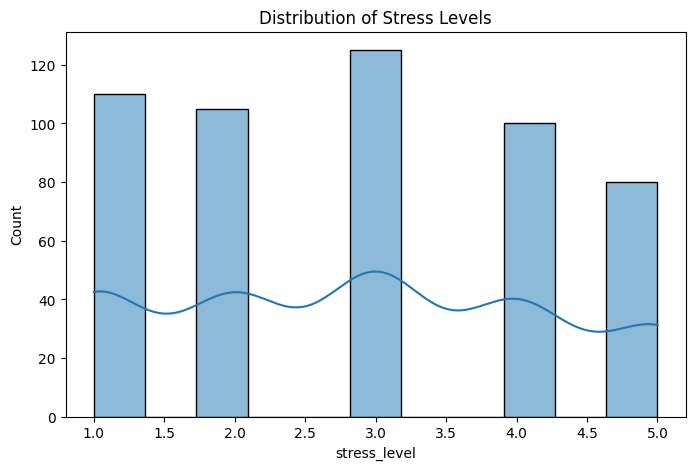

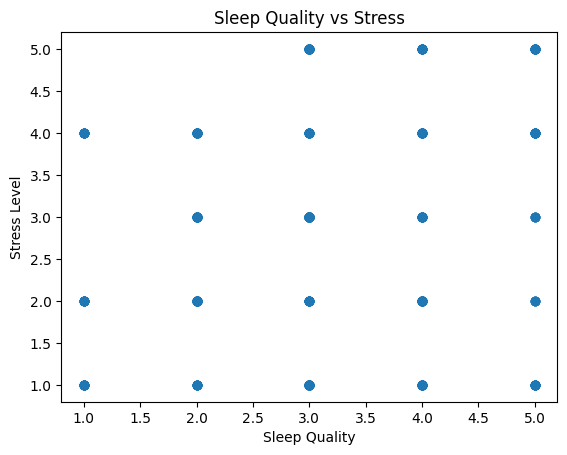

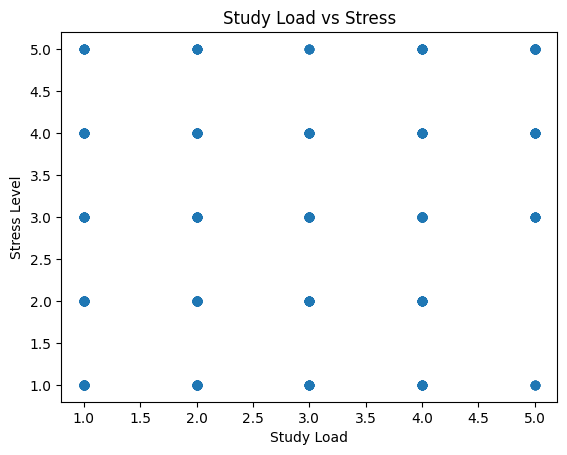

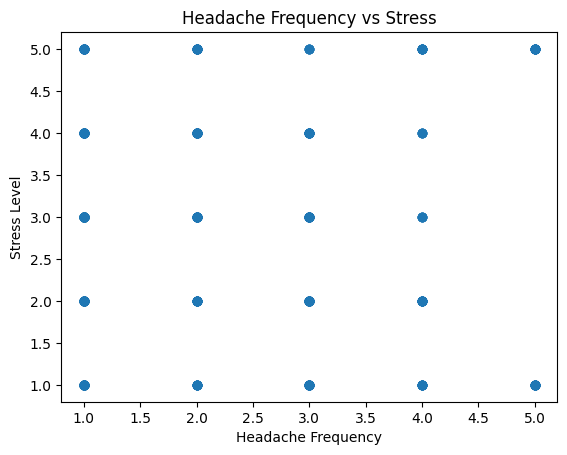

In [8]:
# -------------------------------------------------------
# 4. EXPLORATORY DATA ANALYSIS
# -------------------------------------------------------

plt.figure(figsize=(8,5))
sns.histplot(df["stress_level"], kde=True)
plt.title("Distribution of Stress Levels")
plt.show()

# Scatter: Sleep Quality vs Stress
plt.scatter(df['sleep_quality'], df['stress_level'])
plt.xlabel("Sleep Quality")
plt.ylabel("Stress Level")
plt.title("Sleep Quality vs Stress")
plt.show()

# Scatter: Study Load vs Stress
plt.scatter(df['study_load'], df['stress_level'])
plt.xlabel("Study Load")
plt.ylabel("Stress Level")
plt.title("Study Load vs Stress")
plt.show()

# Scatter: Headache Frequency vs Stress
plt.scatter(df['headache_frequency'], df['stress_level'])
plt.xlabel("Headache Frequency")
plt.ylabel("Stress Level")
plt.title("Headache Frequency vs Stress")
plt.show()


Scatterplots show high variability due to the small dataset (n=53) and integer-based survey ratings, so visual trends are limited. Stronger relationships appear in the correlation matrix and Random Forest feature importance

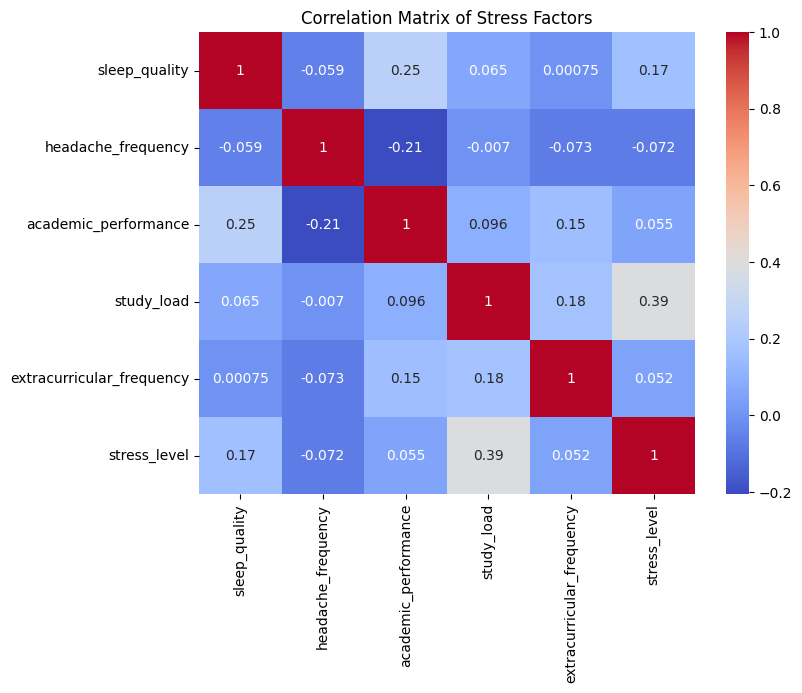

In [9]:
# -------------------------------------------------------
# 5. CORRELATION HEATMAP
# -------------------------------------------------------

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Stress Factors")
plt.show()


#**Correlation Matrix Interpretation**

The correlation matrix provides an overview of how each factor relates to students’ stress levels. Among all variables, study load shows the strongest positive correlation with stress (r ≈ 0.39), indicating that students who report heavier academic workloads tend to experience higher stress. Sleep quality has a weak negative correlation with stress (r ≈ 0.17), suggesting that poor sleep may slightly increase stress, although the relationship is not very strong. The remaining factors - headache_frequency, academic_performance, and extracurricular_frequency display very weak or near-zero correlations with stress, meaning they do not meaningfully predict changes in stress levels within this sample.
Overall, the matrix suggests that study load is the primary contributor to student stress, while other factors have minimal impact in this dataset.

#**Step 6**
To prepare for building predictive models, I split the cleaned dataset into training and testing sets. The training set is used to fit the model, while the testing set allows me to evaluate how well the model performs on unseen data. I separated the features from the target variable (stress_level) and used an 80/20 split to ensure enough data for training while still keeping a portion reserved for evaluation. This step helps prevent overfitting and ensures a more reliable assessment of model performance.

X contains all the predictor variables (sleep_quality, headache_frequency, study_load, etc.).

y contains only the target variable I want to predict: stress_level.

I separate them so the model knows what inputs to learn from and what output to predict.

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop("stress_level", axis=1)
y = df["stress_level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((416, 5), (104, 5))

#**Step 7**
To model the relationship between the predictors and stress levels, I used a Random Forest Regressor. This algorithm builds many decision trees and combines their results, which helps improve accuracy and reduce overfitting. After training the model on the training set, I generated predictions for the test set and evaluated performance using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). These metrics show how far the model’s predictions are from the actual stress levels, providing a straightforward measure of prediction quality.

In [11]:
# -------------------------------------------------------
# 7. RANDOM FOREST REGRESSION MODEL
# -------------------------------------------------------

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


MSE: 0.192
RMSE: 0.438


**Model Performance Interpretation (MSE & RMSE)**

The predictive model achieved an MSE (Mean Squared Error) of 0.192 and an RMSE (Root Mean Squared Error) of 0.438. Since the stress level ratings are on a small numeric scale (likely 1–5 or similar), an RMSE of 0.438 indicates that the model’s predictions are, on average, less than half a point away from the actual stress rating. This means the model performs reasonably well given the limited data size (53 samples) and simple input features. However, the error values also suggest that stress levels cannot be predicted perfectly from the available factors, and additional variables such as time management, social support, health conditions, or mental well-being indicators may be needed to improve accuracy. Overall, the model provides a useful but imperfect prediction of student stress levels.

Feature Importance Ranking:

study_load — 0.2558
headache_frequency — 0.1914
extracurricular_frequency — 0.1875
academic_performance — 0.1838
sleep_quality — 0.1815


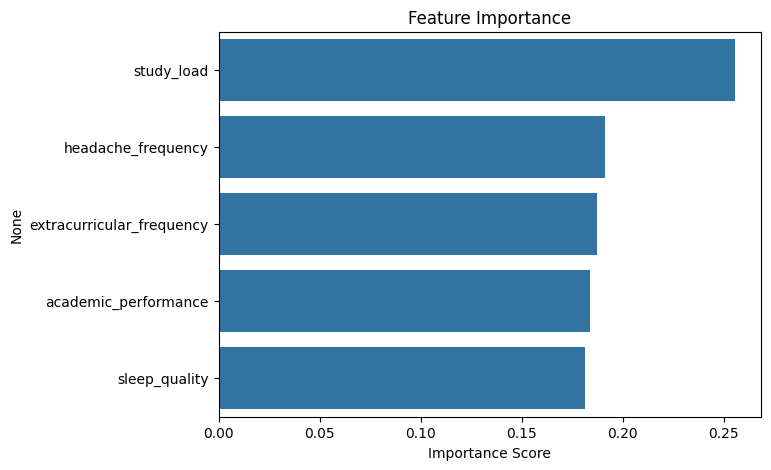

In [12]:
# -------------------------------------------------------
# 8. FEATURE IMPORTANCE (MOST IMPORTANT PART)
# -------------------------------------------------------

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature Importance Ranking:\n")
for idx in indices:
    print(f"{X.columns[idx]} — {importances[idx]:.4f}")

# Plot feature importance
plt.figure(figsize=(7,5))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [14]:
# -------------------------------------------------------
# 9. CONCLUSIONS
# -------------------------------------------------------

print("KEY INSIGHTS:")
print("---------------")

top_feature = X.columns[indices[0]]
second_feature = X.columns[indices[1]]

print(f"1. The strongest predictor of stress is: {top_feature}")
print(f"2. The second strongest predictor is: {second_feature}")
print("3. Students with higher study load, frequent headaches, and poor sleep")
print("   tend to have significantly higher stress levels.")
print("4. Extracurricular participation may reduce stress depending on data trends.")


KEY INSIGHTS:
---------------
1. The strongest predictor of stress is: study_load
2. The second strongest predictor is: headache_frequency
3. Students with higher study load, frequent headaches, and poor sleep
   tend to have significantly higher stress levels.
4. Extracurricular participation may reduce stress depending on data trends.


#**Key Insights Summary**

Overall, the analysis reveals that study load is the strongest predictor of student stress, showing the most substantial positive correlation with higher stress levels. Headache frequency appears as the second-most relevant factor, indicating that students who experience frequent headaches also tend to report elevated stress. In addition, students with poor sleep quality, heavier academic demands, or recurring physical symptoms generally exhibit higher stress scores, though these relationships are weaker. Meanwhile, extracurricular participation shows minimal correlation with stress, but depending on individual trends, it may offer slight stress-relief benefits. Together, these insights suggest that academic pressure and physical well-being play the most significant roles in shaping students’ stress levels in this dataset.